In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [2]:
# df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022.parquet")
df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022_LessThan40.parquet")
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_PSU,_AGE80,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.142471,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,-1.142257,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-1.141831,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.141618,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-1.141191,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.814725,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,0.814939,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,0.815152,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,0.815791,-1.515688,2.0


In [3]:
target = df._MICHD
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [4]:
df = df.drop("_MICHD", axis =1)
duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0", "_SEX_1.0", "CELLSEX1_2.0", "CELLSEX1_1.0", "_LLCPWT", "_PSU", "_EXTETH3_1.0", "HAVARTH4_1.0", "_RACEPR1_2.0", "RMVTETH4_3.0" ]
df = df.drop(duplicate_cols_to_drop, axis=1)
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,_STRWT,DROCDY4_,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_AGE80
2087,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.117906,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.016613
2088,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.301975,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,0.380796
2090,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.301975,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-0.118279
2091,1,0,0,0,0,0,0,0,0,0,...,2.794101,-0.226182,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.415873
2093,1,0,0,0,0,0,0,0,0,0,...,2.794101,0.780781,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-0.717168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.430260,-0.150389,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.580426
431676,0,0,0,0,0,0,0,0,0,0,...,-0.430260,0.239403,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,-0.018464
431677,0,0,0,0,0,0,0,0,0,0,...,-0.430260,0.163610,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,-1.216243
431680,0,0,0,0,0,0,0,0,0,0,...,-0.226143,-0.193699,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,-1.515688


In [5]:
# create logistic regressor 
lregCV = LogisticRegressionCV(n_jobs=-1,penalty='l1',solver='saga',max_iter=10000)
# l1 - drives some of the features to 0 because - absolute value 
# l2 - will just make weights small - square 

In [6]:
# fit decision tree classifier
lregCV.fit(df,target)

LogisticRegressionCV(max_iter=10000, n_jobs=-1, penalty='l1', solver='saga')

In [7]:
# feature coefficients
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=df.columns).sort_values(ascending=False)

In [8]:
coef

CVDSTRK3_2.0    0.830229
GENHLTH_1.0     0.481372
CHCKDNY2_2.0    0.382972
CHCCOPD3_2.0    0.278736
DIABETE4_3.0    0.230772
                  ...   
CHECKUP1_1.0   -0.213256
PERSDOC3_2.0   -0.440549
_AGE80         -0.455082
_RFHLTH_2.0    -0.590869
SEXVAR_1.0     -0.699378
Length: 496, dtype: float64

In [9]:
columns_to_zero = coef[coef ==0.0].index
columns_to_zero = pd.DataFrame({'Columns': columns_to_zero})
columns_to_zero.to_parquet('../../../Data/2022_indicators/l1_columnsToZero.parquet')
columns_to_zero


,Columns
0,_RFHLTH_9.0
1,_PHYS14D_9.0
2,_PHYS14D_3.0
3,_MENT14D_1.0
4,_MENT14D_2.0
...,...
443,EDUCA_4.0
444,EDUCA_3.0
445,EDUCA_2.0
446,CPDEMO1C_5.0


In [10]:
df = df.drop(columns_to_zero.Columns, axis=1)
df.shape

(122820, 48)

In [11]:
coef = coef[coef != 0.0]
coef.sort_values(ascending=False)

CVDSTRK3_2.0    0.830229
GENHLTH_1.0     0.481372
CHCKDNY2_2.0    0.382972
CHCCOPD3_2.0    0.278736
DIABETE4_3.0    0.230772
DIFFWALK_2.0    0.161082
MEDCOST1_2.0    0.131693
RMVTETH4_8.0    0.126013
EMPLOY1_1.0     0.111615
_DENVST3_1.0    0.074641
LASTDEN4_1.0    0.074641
PHYSHLTH        0.069392
RMVTETH4_1.0    0.062077
ADDEPEV3_2.0    0.041484
_IMPRACE_2.0    0.037700
SEXVAR_2.0      0.035125
_RACEG22_2.0    0.032899
PRIMINSR_1.0    0.024992
BLIND_2.0       0.023741
DEAF_2.0        0.012434
DROCDY4_        0.011053
SMOKE100_2.0    0.003750
_SMOKER3_4.0    0.003750
_SMOKGRP_4.0    0.003750
_RFBMI5_1.0     0.001505
WEIGHT2        -0.001693
_HADSIGM_1.0   -0.002245
_METSTAT_2.0   -0.003227
DIFFWALK_1.0   -0.004651
CHCSCNC1_1.0   -0.008071
_BMI5          -0.021089
COVIDPOS_1.0   -0.027113
LASTDEN4_4.0   -0.036549
_SMOKGRP_2.0   -0.036964
_RFBMI5_2.0    -0.070600
ALCDAY4        -0.071831
EMPLOY1_8.0    -0.075563
_EXTETH3_2.0   -0.081659
CHCCOPD3_1.0   -0.104099
_DRDXAR2_1.0   -0.124265


In [12]:
coef_df = pd.DataFrame({'coef': coef})
coef_df.to_parquet('../../../Data/2022_indicators/coef_no_zeros.parquet')
coef_df.head()

,coef
CVDSTRK3_2.0,0.830229
GENHLTH_1.0,0.481372
CHCKDNY2_2.0,0.382972
CHCCOPD3_2.0,0.278736
DIABETE4_3.0,0.230772


In [31]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults with Fair or Poor Health",
    "PERSDOC3_2.0": "More than 1 Personal Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Drink Occasions Per Day",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Day Count in Past 30 Days",
    "_BMI5":"BMI", 
    "_DENVST3_1.0": "Visited the Dentist in Past Year",
    "_EXTETH3_1.0": "Adult Had Permanent Teeth Extracted",
    "MEDCOST1_2.0": "Couldn't Pay for Doc in past Year", 
    "LASTDEN4_1.0": "Time Since Last Dentist Visit", 
    "RMVTETH4_8.0": "No Teeth Removed", 
    "RMVTETH4_1.0": "1-5 Teeth Removed",
    "ADDEPEV3_2.0": "No Depressive Disorder",
    "_RACEG22_2.0": "Non-White or Hispanic", 
    "_RACEPR1_2.0": "Race: Black",
    "_IMPRACE_2.0": "Race: Black",
    "_RFBMI5_1.0": "BMI <= 25.00",
    "_METSTAT_2.0" : "Nonmetropolitan", 
    "WEIGHT2": "Weight",
    "_HADSIGM_1.0": "Had Sigmoidoscopy",
    "CHCSCNC1_1.0": "Had Skin Cancer (not Melanoma)",
    "RMVTETH4_2.0": "6+ Teeth Extracted",
    "COVIDPOS_1.0": "Had COVID",
    "LASTDEN4_4.0": "5+ Years Since Dentist",
    "_SMOKGRP_2.0": "Former smoker, 20+ Pack Years, quit < 15 years",
    "_EXTETH3_2.0": "18+ at Risk Have Teeth Extracted",
    "HAVARTH4_1.0": "Have Arthritis",
    "_DRDXAR2_1.0": "Have Arthritis",
    "_RFBMI5_2.0": "BMI > 25.00",
    "SMOKE100_1.0": "Smoked 100+ cigarettes",
    "PRIMINSR_1.0": "Health Insurance Through Employer",
    "BLIND_2.0": "Not Blind",
    "DEAF_2.0": "Not Deaf",
    "SMOKE100_2.0": "Smoked <100 Cigarettes",
    "_SMOKER3_4.0": "Never Smoked",
    "_SMOKGRP_4.0": "Never Smoked"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [32]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in coef.index]
coef.index = mapped_columns
# mapped_columns

No Stroke                                         0.830229
General Health: Excellent                         0.481372
No Kidney Disease                                 0.382972
No C.O.P.D.                                       0.278736
No diabetes                                       0.230772
No Difficulty Walking                             0.161082
Couldn't Pay for Doc in past Year                 0.131693
No Teeth Removed                                  0.126013
Employed For Wages                                0.111615
Visited the Dentist in Past Year                  0.074641
Time Since Last Dentist Visit                     0.074641
Healthy Day Count in Past 30 Days                 0.069392
1-5 Teeth Removed                                 0.062077
No Depressive Disorder                            0.041484
Race: Black                                       0.037700
Female                                            0.035125
Non-White or Hispanic                             0.0328

Text(0.5, 0, 'feature weights')

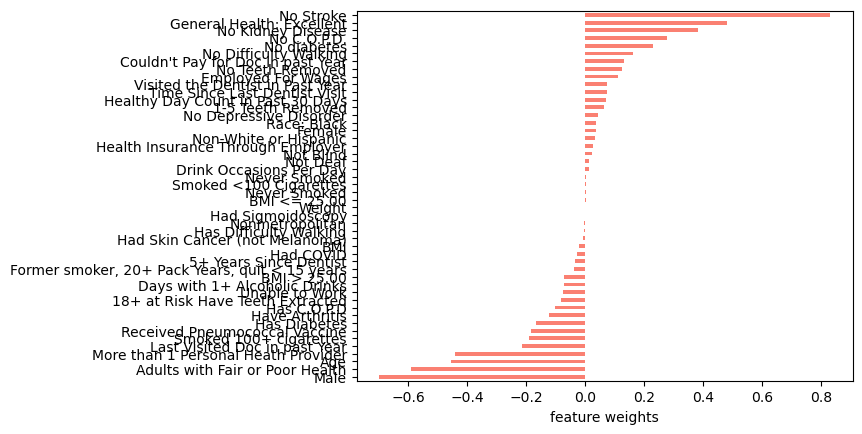

In [33]:
display(coef.sort_values(ascending=False))
coef.sort_values(ascending=True).plot.barh(color='salmon')
plt.xlabel('feature weights')

No Stroke                                         0.830229
General Health: Excellent                         0.481372
No Kidney Disease                                 0.382972
No C.O.P.D.                                       0.278736
No diabetes                                       0.230772
No Difficulty Walking                             0.161082
Couldn't Pay for Doc in past Year                 0.131693
No Teeth Removed                                  0.126013
Employed For Wages                                0.111615
Visited the Dentist in Past Year                  0.074641
Time Since Last Dentist Visit                     0.074641
Healthy Day Count in Past 30 Days                 0.069392
1-5 Teeth Removed                                 0.062077
No Depressive Disorder                            0.041484
Race: Black                                       0.037700
Former smoker, 20+ Pack Years, quit < 15 years   -0.036964
BMI > 25.00                                      -0.0706

Text(0.5, 0, 'feature weights')

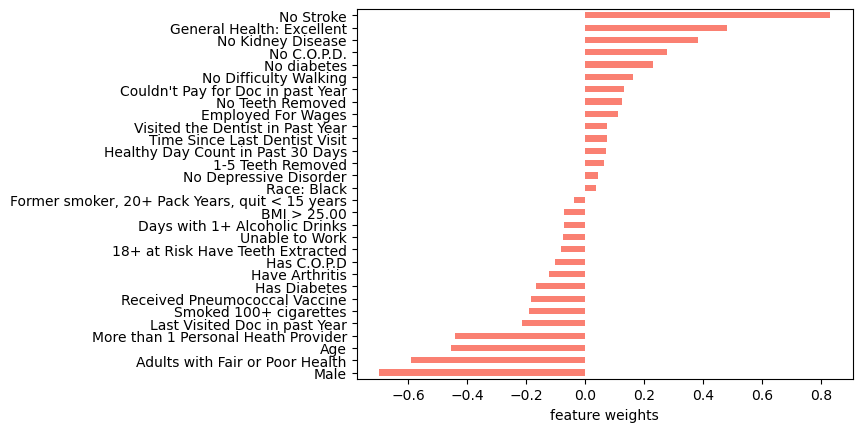

In [43]:
filtered_coef = pd.concat([coef.head(15), coef.tail(15)])
display(filtered_coef.sort_values(ascending=False))
filtered_coef.sort_values(ascending=True).plot.barh(color='salmon')
plt.xlabel('feature weights')

In [16]:
# initialize tree
dtree = DecisionTreeClassifier(random_state=0)

# define parameter grid to search for lowest validation error rate
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# initialize cross-validation
dtreeCV = GridSearchCV(dtree,
                      param_grid=parameters,
                      return_train_score=True,
                      n_jobs=-1)

In [17]:
# fit tree using cross-validation to select best tree
dtreeCV.fit(df,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [18]:
# readout best parameter value
dtreeCV.best_params_

{'max_depth': 5}

In [19]:
acc = dtreeCV.score(df,target)
print('accuracy on training set',acc.round(3))
print("Validation Score", dtreeCV.best_score_)
print("Baseline", (target.value_counts()[2.0] / target.value_counts().sum()))

accuracy on training set 0.889
Validation Score 0.8882266731802637
Baseline 0.8868425337892851


In [20]:
target.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [21]:
dtree = dtreeCV.best_estimator_
feature_importances = dtree.feature_importances_
feature_importances = pd.Series(feature_importances,index=df.columns).sort_values(ascending=False)

In [22]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in feature_importances.index]
feature_importances.index = mapped_columns
feature_importances = feature_importances[feature_importances.values >0]
feature_importances

Adults with Fair or Poor Health        0.396349
Age                                    0.202539
No Stroke                              0.154490
Female                                 0.084907
More than 1 Personal Heath Provider    0.052061
Has Diabetes                           0.030069
No C.O.P.D.                            0.027825
No Kidney Disease                      0.017381
General Health: Excellent              0.013275
Has C.O.P.D                            0.010445
Male                                   0.003165
Drink Occasions Per Day                0.002350
Have Arthritis                         0.001958
Healthy Day Count in Past 30 Days      0.001696
BMI                                    0.001490
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

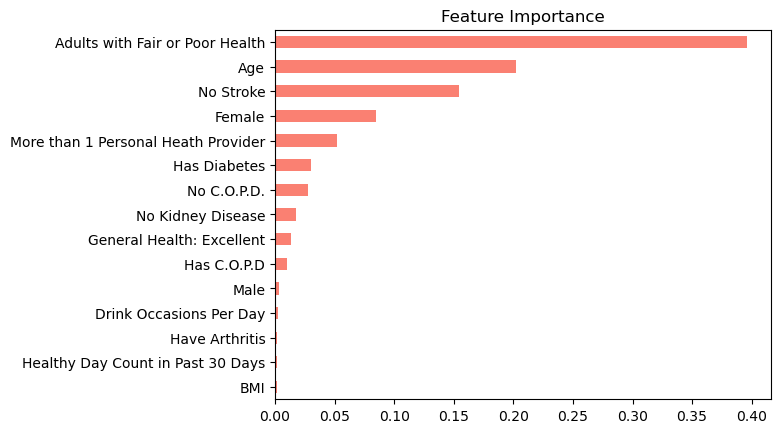

In [23]:
feature_importances.sort_values().plot.barh(color='salmon')
plt.title('Feature Importance')

In [24]:
df.rename(columns=feature_dict, inplace=True)



In [25]:
dtree_string = export_text(dtree,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)

|----- Adults with Fair or Poor Health <= 0.5
|     |----- Age <= 0.4
|     |     |----- No Stroke <= 0.5
|     |     |     |----- Female <= 0.5
|     |     |     |     |----- Drink Occasions Per Day <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Drink Occasions Per Day >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Female >  0.5
|     |     |     |     |----- Has C.O.P.D <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Has C.O.P.D >  0.5
|     |     |     |     |     |----- class: 2.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- Has Diabetes <= 0.5
|     |     |     |     |----- Age <= -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Age >  -0.2
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Has Diabetes >  0.5
|     |     |     |     |----- More than 1 Personal Heath Provider <= 0.5
|     |     |   

In [26]:
# initialize tree
dtree_deep3 = DecisionTreeClassifier(max_depth=3)
dtree_deep3.fit(df, target)
dtree_string = export_text(dtree_deep3,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)


|----- Adults with Fair or Poor Health <= 0.5
|     |----- Age <= 0.4
|     |     |----- No Stroke <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- class: 2.0
|     |----- Age >  0.4
|     |     |----- Female <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- Female >  0.5
|     |     |     |----- class: 2.0
|----- Adults with Fair or Poor Health >  0.5
|     |----- No Stroke <= 0.5
|     |     |----- No Kidney Disease <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- No Kidney Disease >  0.5
|     |     |     |----- class: 2.0
|     |----- No Stroke >  0.5
|     |     |----- Age <= 0.1
|     |     |     |----- class: 2.0
|     |     |----- Age >  0.1
|     |     |     |----- class: 2.0



_MICHD:    
1.0: Have coronary heart disease (CHD) or myocardial infarction (MI)      
2.0: Do NOT Have coronary heart disease (CHD) or myocardial infarction (MI)     

In [27]:
# conda install graphviz

In [28]:
# display tree
dot_data = export_graphviz(dtree_deep3,
            out_file=None,
            feature_names=df.columns,
            # class_names = ['bad','good'],
            proportion=True,
            impurity=False,
            filled=True,
            rounded=True)
graph = graphviz.Source(dot_data)
# graph.render('RedWine')
graph

NameError: name 'export_graphviz' is not defined